In [2]:
import numpy as np
import matplotlib.pyplot as plt
keys=np.loadtxt("KeyboardData1.csv",dtype='str',delimiter=',')
labels = keys[1:,0]
keys=keys[:,1:] # On retire la premiere colonne
varbs=keys[0,:] #nom des variables
X=keys[1:,:].astype(float)

In [3]:
print(X)
print(labels)

[[0.1491 0.2488 0.1069 ... 0.1338 0.2171 0.0742]
 [0.1111 0.234  0.0694 ... 0.0839 0.1917 0.0747]
 [0.1328 0.0744 0.0731 ... 0.1085 0.1762 0.0945]
 ...
 [0.0939 0.025  0.1008 ... 0.1034 0.0983 0.0905]
 [0.0923 0.0371 0.0913 ... 0.0979 0.0938 0.0931]
 [0.0596 0.0714 0.0992 ... 0.0807 0.1186 0.1018]]
['2' '2' '2' ... '57' '57' '57']


### Analyse discriminante linéaire 

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

lda = LinearDiscriminantAnalysis()
lda.fit(X,labels)
yhat = lda.predict(X)
errl=sum(labels!=yhat)/len(labels)
print("Taux d'erreur: ",round(errl,4))

Taux d'erreur:  0.22


In [5]:
print(yhat)

['2' '31' '2' ... '57' '26' '55']


### Avec validation croisée
On fait ici la validation croisée la plus simple en coupant l'ensemble en deux


Taux d'erreur:  0.219


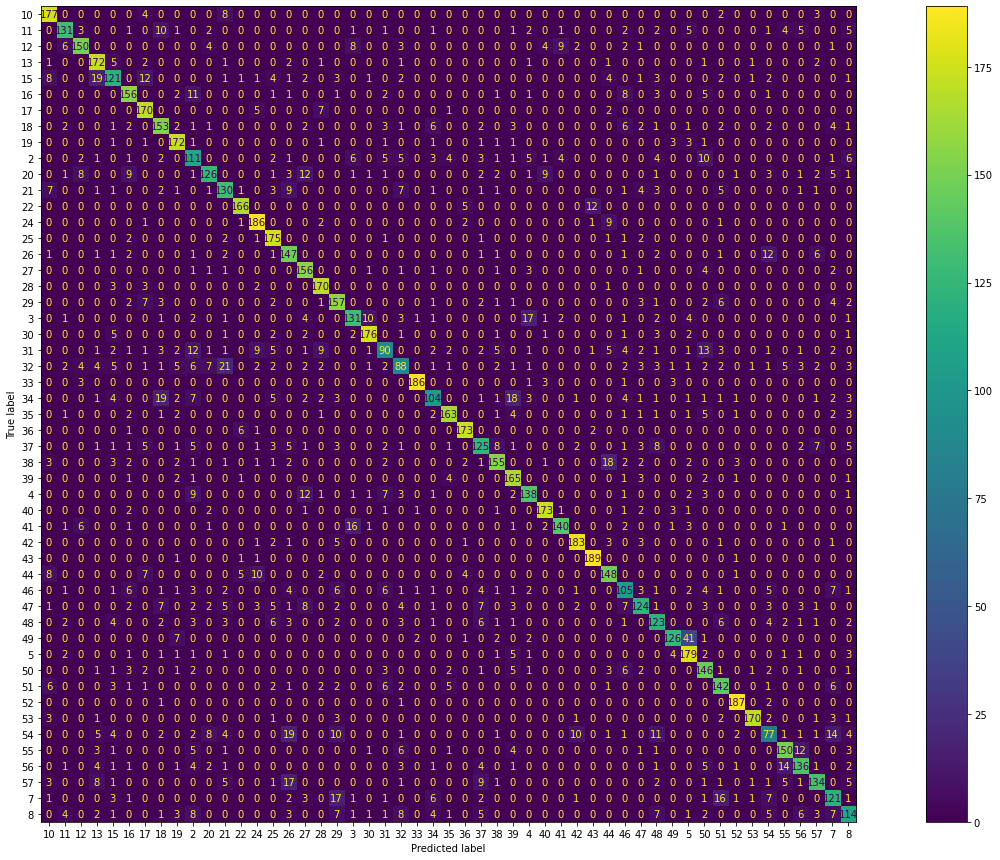

In [37]:
y = labels
ntest=np.floor(len(y)/2).astype(int)
per=np.random.permutation(len(y))
lt,la=per[:ntest], per[ntest:]
Xa,Xt=X[la,:],X[lt,:] 
ya,yt=y[la],y[lt] 
lda.fit(Xa,ya)
yhat = lda.predict(Xt)      
errl=sum(yt!=yhat)/len(yt)
print("Taux d'erreur: ",round(errl,3))
plot_confusion_matrix(lda, Xt, yt)

### Moyenne de N tirage

In [43]:
N = 10
errl=0
for i in range(N):
    ntest=np.floor(len(y)/2).astype(int)
    per=np.random.permutation(len(y))
    lt,la=per[:ntest], per[ntest:]
    Xa,Xt=X[la,:],X[lt,:] 
    ya,yt=y[la],y[lt] 
    lda.fit(Xa,ya)
    yhat = lda.predict(Xt)      
    errl+=sum(yt!=yhat)/len(yt)
errl = errl/N
print(round(errl,4))

0.226


### Analyse discriminante quadratique 

In [44]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lda = QuadraticDiscriminantAnalysis()
lda.fit(X,y)
yhat = lda.predict(X)
errl=sum(y!=yhat)/len(y)
print("Taux d'erreur: ",round(errl,3))
conf =  confusion_matrix(y,yhat)

Taux d'erreur:  0.17


Taux d'erreur:  0.219


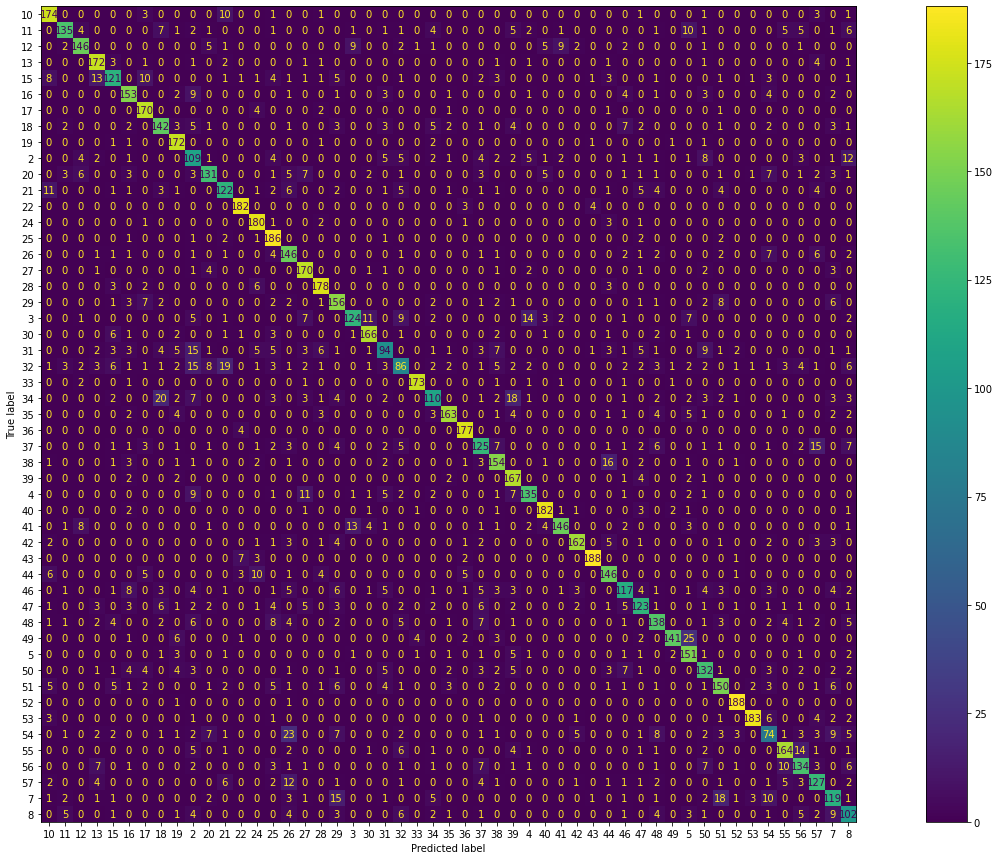

In [40]:
ntest=np.floor(len(y)/2).astype(int)
per=np.random.permutation(len(y))
lt,la=per[:ntest], per[ntest:]
Xa,Xt=X[la,:],X[lt,:] 
ya,yt=y[la],y[lt] 
lda.fit(Xa,ya)
yhat = lda.predict(Xt)      
errl=sum(yt!=yhat)/len(yt)
print("Taux d'erreur: ",round(errl,3))
plt.rcParams['figure.figsize'] = [25, 15]
plot_confusion_matrix(lda, Xt, yt)
plt.show()

In [42]:
print(len(y))
print(ntest)

19176
9588


In [45]:
N = 10
errl=0
for i in range(N):
    ntest=np.floor(len(y)/2).astype(int)
    per=np.random.permutation(len(y))
    lt,la=per[:ntest], per[ntest:]
    Xa,Xt=X[la,:],X[lt,:] 
    ya,yt=y[la],y[lt] 
    lda.fit(Xa,ya)
    yhat = lda.predict(Xt)      
    errl+=sum(yt!=yhat)/len(yt)
errl = errl/N
print(round(errl,4))

0.2106
